In [233]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
from collections import Counter

In [234]:
train = pd.read_csv('prob2/train.csv')

In [235]:
train.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,gf,ce,...,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0


In [236]:
test = pd.read_csv('prob2/test.csv')

In [237]:
test.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42
0,id_1,4.736842e-07,0.162737,0.0,2.105000e-06,2.769737e-07,4.828947e-07,1.300010e-07,da,tn,...,0,0,0,0,0,0,0,0,0,0
1,id_6,6.578947e-08,0.086391,0.0,7.500000e-07,1.315789e-07,9.868421e-08,3.186300e-08,pu,ce,...,0,0,0,0,0,0,0,0,0,0
2,id_9,1.585526e-07,0.159987,0.0,2.105000e-06,2.769737e-07,1.585526e-07,4.715724e-08,da,tn,...,0,0,0,0,0,0,0,0,0,0
3,id_14,8.552632e-08,0.088083,0.0,7.500000e-07,8.552632e-08,9.868421e-08,4.142190e-08,pu,ce,...,0,0,0,0,0,0,0,0,0,0
4,id_15,1.144737e-07,0.089563,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.452953e-07,gf,ce,...,0,0,0,0,0,0,0,0,0,0


In [6]:
for l in test.columns:
    print('{} has {} null values'.format(l,test[l].isnull().sum()))

transaction_id has 0 null values
num_var_1 has 0 null values
num_var_2 has 0 null values
num_var_3 has 0 null values
num_var_4 has 0 null values
num_var_5 has 0 null values
num_var_6 has 0 null values
num_var_7 has 0 null values
cat_var_1 has 18692 null values
cat_var_2 has 0 null values
cat_var_3 has 53362 null values
cat_var_4 has 0 null values
cat_var_5 has 0 null values
cat_var_6 has 21943 null values
cat_var_7 has 0 null values
cat_var_8 has 8138 null values
cat_var_9 has 0 null values
cat_var_10 has 0 null values
cat_var_11 has 0 null values
cat_var_12 has 0 null values
cat_var_13 has 0 null values
cat_var_14 has 0 null values
cat_var_15 has 0 null values
cat_var_16 has 0 null values
cat_var_17 has 0 null values
cat_var_18 has 0 null values
cat_var_19 has 0 null values
cat_var_20 has 0 null values
cat_var_21 has 0 null values
cat_var_22 has 0 null values
cat_var_23 has 0 null values
cat_var_24 has 0 null values
cat_var_25 has 0 null values
cat_var_26 has 0 null values
cat_var_27 

In [7]:
for l in train.columns:
    print('{} has {} null values'.format(l,train[l].isnull().sum()))

transaction_id has 0 null values
num_var_1 has 0 null values
num_var_2 has 0 null values
num_var_3 has 0 null values
num_var_4 has 0 null values
num_var_5 has 0 null values
num_var_6 has 0 null values
num_var_7 has 0 null values
cat_var_1 has 15782 null values
cat_var_2 has 0 null values
cat_var_3 has 43853 null values
cat_var_4 has 0 null values
cat_var_5 has 0 null values
cat_var_6 has 0 null values
cat_var_7 has 0 null values
cat_var_8 has 109738 null values
cat_var_9 has 0 null values
cat_var_10 has 0 null values
cat_var_11 has 0 null values
cat_var_12 has 0 null values
cat_var_13 has 0 null values
cat_var_14 has 0 null values
cat_var_15 has 0 null values
cat_var_16 has 0 null values
cat_var_17 has 0 null values
cat_var_18 has 0 null values
cat_var_19 has 0 null values
cat_var_20 has 0 null values
cat_var_21 has 0 null values
cat_var_22 has 0 null values
cat_var_23 has 0 null values
cat_var_24 has 0 null values
cat_var_25 has 0 null values
cat_var_26 has 0 null values
cat_var_27 ha

In [8]:
for l in train.columns:
    if(l!='transaction_id' and train[l].dtype!='object'):
        print ('{} - {}'.format(l,train[l].mean()))
        
for l in test.columns:
    if(l!='transaction_id' and test[l].dtype!='object'):
        print ('{} - {}'.format(l,test[l].mean()))

num_var_1 - 2.05973091578e-05
num_var_2 - 0.160586322294
num_var_3 - 1.07703657241e-05
num_var_4 - 4.60432360493e-05
num_var_5 - 8.18793078044e-06
num_var_6 - 1.48276824116e-05
num_var_7 - 1.94255374578e-05
cat_var_19 - 0.520279215309
cat_var_20 - 0.479720784691
cat_var_21 - 0.672257276963
cat_var_22 - 0.321796789482
cat_var_23 - 0.00594593355455
cat_var_24 - 0.999097364304
cat_var_25 - 0.000123216936311
cat_var_26 - 0.000553043458327
cat_var_27 - 2.86551014677e-06
cat_var_28 - 2.57895913209e-05
cat_var_29 - 5.44446927887e-05
cat_var_30 - 0.000117485916018
cat_var_31 - 0.0
cat_var_32 - 5.73102029354e-06
cat_var_33 - 5.73102029354e-06
cat_var_34 - 2.86551014677e-06
cat_var_35 - 0.0
cat_var_36 - 0.0
cat_var_37 - 0.0
cat_var_38 - 0.0
cat_var_39 - 8.59653044031e-06
cat_var_40 - 0.0
cat_var_41 - 2.86551014677e-06
cat_var_42 - 0.0
target - 0.107078383165
num_var_1 - 1.74023296391e-05
num_var_2 - 0.160847638949
num_var_3 - 2.15407725983e-05
num_var_4 - 4.31126213164e-05
num_var_5 - 6.94316023

In [238]:
train.drop([ 'cat_var_38', 'cat_var_42'], axis=1, inplace=True)
test.drop([ 'cat_var_38', 'cat_var_42'], axis=1, inplace=True)

In [239]:
train.columns

Index([u'transaction_id', u'num_var_1', u'num_var_2', u'num_var_3',
       u'num_var_4', u'num_var_5', u'num_var_6', u'num_var_7', u'cat_var_1',
       u'cat_var_2', u'cat_var_3', u'cat_var_4', u'cat_var_5', u'cat_var_6',
       u'cat_var_7', u'cat_var_8', u'cat_var_9', u'cat_var_10', u'cat_var_11',
       u'cat_var_12', u'cat_var_13', u'cat_var_14', u'cat_var_15',
       u'cat_var_16', u'cat_var_17', u'cat_var_18', u'cat_var_19',
       u'cat_var_20', u'cat_var_21', u'cat_var_22', u'cat_var_23',
       u'cat_var_24', u'cat_var_25', u'cat_var_26', u'cat_var_27',
       u'cat_var_28', u'cat_var_29', u'cat_var_30', u'cat_var_31',
       u'cat_var_32', u'cat_var_33', u'cat_var_34', u'cat_var_35',
       u'cat_var_36', u'cat_var_37', u'cat_var_39', u'cat_var_40',
       u'cat_var_41', u'target'],
      dtype='object')

In [240]:
target = train['target']
train.drop(['target'], axis=1, inplace=True)

In [241]:
train_test = pd.concat([train, test])

In [242]:
for l in train_test.columns:
    if(train_test[l].dtype==object and l!='transaction_id'):
        train_test[l] = train_test[l].astype('category').cat.codes

In [171]:
train_test.dtypes

transaction_id     object
num_var_1         float64
num_var_2         float64
num_var_3         float64
num_var_4         float64
num_var_5         float64
num_var_6         float64
num_var_7         float64
cat_var_1           int16
cat_var_2            int8
cat_var_3           int16
cat_var_4            int8
cat_var_5            int8
cat_var_6           int16
cat_var_7            int8
cat_var_8           int16
cat_var_9            int8
cat_var_10           int8
cat_var_11           int8
cat_var_12           int8
cat_var_13           int8
cat_var_14           int8
cat_var_15           int8
cat_var_16           int8
cat_var_17           int8
cat_var_18           int8
cat_var_19          int64
cat_var_20          int64
cat_var_21          int64
cat_var_22          int64
cat_var_23          int64
cat_var_24          int64
cat_var_25          int64
cat_var_26          int64
cat_var_27          int64
cat_var_28          int64
cat_var_29          int64
cat_var_30          int64
cat_var_31  

In [172]:
cluster_map = [x for x in train_test.columns if train_test[x].dtype=='float64']
print cluster_map

['num_var_1', 'num_var_2', 'num_var_3', 'num_var_4', 'num_var_5', 'num_var_6', 'num_var_7']


In [31]:
clust = train_test[cluster_map]
rbs = RobustScaler()
clust2 = rbs.fit_transform(clust)
    
km1 = KMeans(n_clusters=10)
km2 = km1.fit(clust2)
label = km2.predict(clust2)
    
silhouette_score(clust2, label, sample_size=10000)

0.99981554365013547

In [32]:
Counter(label)

Counter({0: 872273, 1: 15, 2: 2, 3: 4, 4: 6, 5: 61, 6: 9, 7: 3, 8: 1, 9: 70})

In [33]:
train_test['cluster'] = label

In [243]:
train_modified = train_test[:train.shape[0]]
test_modified = train_test[-test.shape[0]:]

In [35]:
train_modified.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_32,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_39,cat_var_40,cat_var_41,cluster
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,-1,3,...,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,65,50,...,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,127,3,...,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,-1,3,...,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,65,50,...,0,0,0,0,0,0,0,0,0,0


In [244]:
train_modified.replace(-1, np.nan)
test_modified.replace(-1, np.nan)

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_31,cat_var_32,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_39,cat_var_40,cat_var_41
0,id_1,4.736842e-07,0.162737,0.0,2.105000e-06,2.769737e-07,4.828947e-07,1.300010e-07,65.0,50,...,0,0,0,0,0,0,0,0,0,0
1,id_6,6.578947e-08,0.086391,0.0,7.500000e-07,1.315789e-07,9.868421e-08,3.186300e-08,324.0,3,...,0,0,0,0,0,0,0,0,0,0
2,id_9,1.585526e-07,0.159987,0.0,2.105000e-06,2.769737e-07,1.585526e-07,4.715724e-08,65.0,50,...,0,0,0,0,0,0,0,0,0,0
3,id_14,8.552632e-08,0.088083,0.0,7.500000e-07,8.552632e-08,9.868421e-08,4.142190e-08,324.0,3,...,0,0,0,0,0,0,0,0,0,0
4,id_15,1.144737e-07,0.089563,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.452953e-07,127.0,3,...,0,0,0,0,0,0,0,0,0,0
5,id_19,8.572368e-07,0.582214,0.0,7.680000e-06,2.631579e-07,1.485526e-06,2.048791e-07,13.0,3,...,0,0,0,0,0,0,0,0,0,0
6,id_20,1.578947e-07,0.293751,0.0,5.865000e-06,6.355263e-07,1.578947e-07,7.647119e-08,476.0,3,...,0,0,0,0,0,0,0,0,0,0
7,id_24,1.348684e-07,0.162737,0.0,2.105000e-06,2.769737e-07,1.348684e-07,9.558899e-08,65.0,50,...,0,0,0,0,0,0,0,0,0,0
8,id_25,9.361842e-07,0.494026,0.0,2.890000e-06,3.407895e-07,3.730263e-07,7.647119e-09,315.0,3,...,0,0,0,0,0,0,0,0,0,0
9,id_28,5.263158e-09,0.078355,0.0,3.550000e-07,4.671053e-08,4.407895e-08,4.938765e-08,127.0,3,...,0,0,0,0,0,0,0,0,0,0


In [245]:
train_modified['target'] = target

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
train_modified.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_39,cat_var_40,cat_var_41,cluster,target
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,-1,3,...,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,65,50,...,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,127,3,...,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,-1,3,...,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,65,50,...,0,0,0,0,0,0,0,0,0,0


In [246]:
train_modified['target'].value_counts()

0    311610
1     37368
Name: target, dtype: int64

In [247]:
train_0_37368 = train_modified[train_modified['target']==0].sample(n=int(37368*10/4))
#train_0_37368 = train_modified[train_modified['target']==0]

In [248]:
train_1 = train_modified[train_modified['target']==1]

In [249]:
new_train_modified = pd.concat([train_0_37368, train_1])

In [43]:
new_train_modified.head(5)

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_39,cat_var_40,cat_var_41,cluster,target
301902,id_675697,1.159868e-06,0.447182,0.0,8.605000e-06,1.080263e-06,1.159868e-06,5.617446e-07,274,3,...,0,0,0,0,0,0,0,0,0,0
221816,id_342694,1.578947e-08,0.083007,0.0,3.550000e-07,4.671053e-08,4.407895e-08,2.230410e-09,127,3,...,0,0,0,0,0,0,0,0,0,0
94510,id_591387,7.434211e-07,0.197526,0.0,2.193000e-05,2.871711e-06,4.407895e-08,2.243155e-07,104,3,...,0,0,0,0,0,0,0,0,0,0
309570,id_707507,3.855263e-07,0.299989,0.0,8.690000e-06,3.789474e-07,1.100000e-06,9.144680e-08,44,3,...,0,0,0,0,0,0,0,0,0,0
313011,id_722153,3.250000e-07,0.085016,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.150254e-06,127,3,...,0,0,0,0,0,0,0,0,0,0


In [102]:
for l in new_train_modified.columns:
    if(l!='transaction_id' and new_train_modified[l].dtype!='object'):
        print ('{} - {}'.format(l,new_train_modified[l].mean()))

num_var_1 - 4.58861728231e-05
num_var_2 - 0.161815109753
num_var_3 - 6.64407680553e-06
num_var_4 - 8.09090765896e-05
num_var_5 - 1.75346038107e-05
num_var_6 - 2.98382255909e-05
num_var_7 - 4.11677667115e-05
cat_var_1 - 164.855908799
cat_var_2 - 17.7888487476
cat_var_3 - 273.686376044
cat_var_4 - 0.634987154785
cat_var_5 - 0.474108863198
cat_var_6 - 319.400200706
cat_var_7 - 4.01736512524
cat_var_8 - 105.852255941
cat_var_9 - 2.0515655106
cat_var_10 - 12.5817597945
cat_var_11 - 2.11523763648
cat_var_12 - 2.8564386641
cat_var_13 - 18.1759553629
cat_var_14 - 2.63681759794
cat_var_15 - 0.344596981374
cat_var_16 - 0.912676621708
cat_var_17 - 0.687170841362
cat_var_18 - 0.465928066795
cat_var_19 - 0.546026011561
cat_var_20 - 0.453973988439
cat_var_21 - 0.698619139371
cat_var_22 - 0.295536287733
cat_var_23 - 0.0058445728966
cat_var_24 - 0.997615606936
cat_var_25 - 0.00028901734104
cat_var_26 - 0.00146114322415
cat_var_27 - 8.02825947335e-06
cat_var_28 - 7.22543352601e-05
cat_var_29 - 0.000152

In [45]:
for l in test_modified.columns:
    if(l!='transaction_id' and test_modified[l].dtype!='object'):
        print ('{} - {}'.format(l,test_modified[l].mean()))

num_var_1 - 1.74023296391e-05
num_var_2 - 0.160847638949
num_var_3 - 2.15407725983e-05
num_var_4 - 4.31126213164e-05
num_var_5 - 6.94316023918e-06
num_var_6 - 1.55127418118e-05
num_var_7 - 2.25264651155e-05
cat_var_1 - 156.337853843
cat_var_2 - 17.6486171022
cat_var_3 - 284.428858799
cat_var_4 - 0.669262187038
cat_var_5 - 0.499327559001
cat_var_6 - 308.196115889
cat_var_7 - 4.00683138924
cat_var_8 - 108.052452308
cat_var_9 - 2.06181108229
cat_var_10 - 12.6837101168
cat_var_11 - 2.11813374699
cat_var_12 - 2.90063538033
cat_var_13 - 17.4852101187
cat_var_14 - 2.34432608804
cat_var_15 - 0.323658079035
cat_var_16 - 0.918602163273
cat_var_17 - 0.726561037393
cat_var_18 - 0.429766212132
cat_var_19 - 0.522488566593
cat_var_20 - 0.477511433407
cat_var_21 - 0.671913744159
cat_var_22 - 0.322013273068
cat_var_23 - 0.00607298277252
cat_var_24 - 0.999100228095
cat_var_25 - 0.000101248218604
cat_var_26 - 0.00058456518666
cat_var_27 - 5.73103124176e-06
cat_var_28 - 2.2924124967e-05
cat_var_29 - 6.113

In [250]:
new_target = new_train_modified['target']

In [251]:
new_train_modified.drop(['target'], axis=1, inplace=True)

In [252]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [253]:
final_features = [x for x in new_train_modified.columns if x not in ['transaction_id']]
print(final_features)

['num_var_1', 'num_var_2', 'num_var_3', 'num_var_4', 'num_var_5', 'num_var_6', 'num_var_7', 'cat_var_1', 'cat_var_2', 'cat_var_3', 'cat_var_4', 'cat_var_5', 'cat_var_6', 'cat_var_7', 'cat_var_8', 'cat_var_9', 'cat_var_10', 'cat_var_11', 'cat_var_12', 'cat_var_13', 'cat_var_14', 'cat_var_15', 'cat_var_16', 'cat_var_17', 'cat_var_18', 'cat_var_19', 'cat_var_20', 'cat_var_21', 'cat_var_22', 'cat_var_23', 'cat_var_24', 'cat_var_25', 'cat_var_26', 'cat_var_27', 'cat_var_28', 'cat_var_29', 'cat_var_30', 'cat_var_31', 'cat_var_32', 'cat_var_33', 'cat_var_34', 'cat_var_35', 'cat_var_36', 'cat_var_37', 'cat_var_39', 'cat_var_40', 'cat_var_41']


In [145]:
final_features_2 = [x for x in new_train_modified.columns if x not in ['transaction_id',  'cat_var_27']]#, 'cat_var_4', 'cat_var_24', 'cat_var_25', 'cat_var_26', 'cat_var_27', 'cat_var_28', 'cat_var_29', 'cat_var_30', 'cat_var_31', 'cat_var_32', 'cat_var_33', 'cat_var_34', 'cat_var_35', 'cat_var_36', 'cat_var_37', 'cat_var_39', 'cat_var_40', 'cat_var_41']]
print(final_features_2)

['num_var_1', 'num_var_2', 'num_var_3', 'num_var_4', 'num_var_5', 'num_var_6', 'num_var_7', 'cat_var_1', 'cat_var_2', 'cat_var_3', 'cat_var_4', 'cat_var_5', 'cat_var_6', 'cat_var_7', 'cat_var_8', 'cat_var_9', 'cat_var_10', 'cat_var_11', 'cat_var_12', 'cat_var_13', 'cat_var_14', 'cat_var_15', 'cat_var_16', 'cat_var_17', 'cat_var_18', 'cat_var_19', 'cat_var_20', 'cat_var_21', 'cat_var_22', 'cat_var_23', 'cat_var_24', 'cat_var_25', 'cat_var_26', 'cat_var_28', 'cat_var_29', 'cat_var_30', 'cat_var_31', 'cat_var_32', 'cat_var_33', 'cat_var_34', 'cat_var_35', 'cat_var_36', 'cat_var_37', 'cat_var_39', 'cat_var_40', 'cat_var_41', 'cluster']


In [254]:
X_train, X_valid, y_train, y_valid = train_test_split(new_train_modified, new_target, train_size = 0.99, random_state = 2017)

In [255]:
dtrain = xgb.DMatrix(data=X_train[final_features], label=y_train)
dvalid = xgb.DMatrix(data=X_valid[final_features], label=y_valid)
dtest = xgb.DMatrix(data=test_modified[final_features])
watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

In [256]:
params ={'eta':0.1,'seed':0,'subsample':1,'colsample_bytree':0.8,'objective':'binary:logistic','max_depth':3,'min_child_weight':1}

In [257]:
from sklearn.metrics import roc_auc_score
def multAcc(pred, dtrain):
    label = dtrain.get_label()
    acc = roc_auc_score(label, pred)
    return 'maccuracy', acc

In [258]:
clf1 = xgb.train(params, dtrain, 1500, watchlist, maximize=True, verbose_eval=20, early_stopping_rounds=200, feval=multAcc)

[0]	train-error:0.227819	eval-error:0.230887	train-maccuracy:0.648634	eval-maccuracy:0.637322
Multiple eval metrics have been passed: 'eval-maccuracy' will be used for early stopping.

Will train until eval-maccuracy hasn't improved in 200 rounds.
[20]	train-error:0.205298	eval-error:0.201835	train-maccuracy:0.712769	eval-maccuracy:0.696744
[40]	train-error:0.195049	eval-error:0.19419	train-maccuracy:0.719879	eval-maccuracy:0.706833
[60]	train-error:0.192702	eval-error:0.189602	train-maccuracy:0.722076	eval-maccuracy:0.706077
[80]	train-error:0.190964	eval-error:0.188073	train-maccuracy:0.724426	eval-maccuracy:0.708224
[100]	train-error:0.188577	eval-error:0.184251	train-maccuracy:0.726252	eval-maccuracy:0.712713
[120]	train-error:0.186724	eval-error:0.185015	train-maccuracy:0.728308	eval-maccuracy:0.713519
[140]	train-error:0.185094	eval-error:0.186544	train-maccuracy:0.72949	eval-maccuracy:0.712093
[160]	train-error:0.184453	eval-error:0.185015	train-maccuracy:0.730415	eval-maccuracy

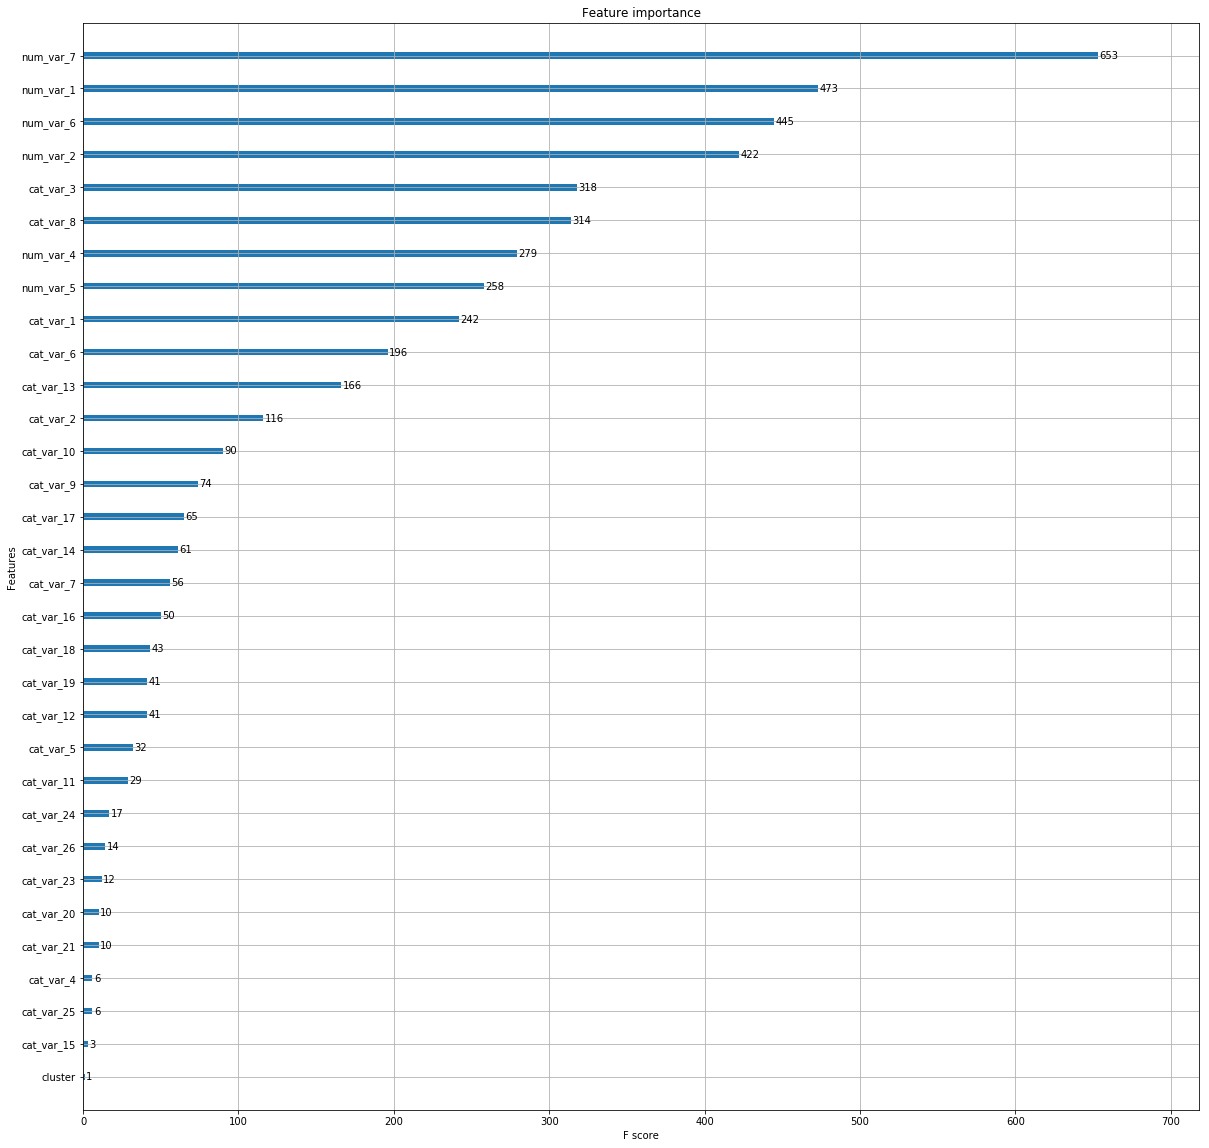

In [137]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,20
xgb.plot_importance(clf1)

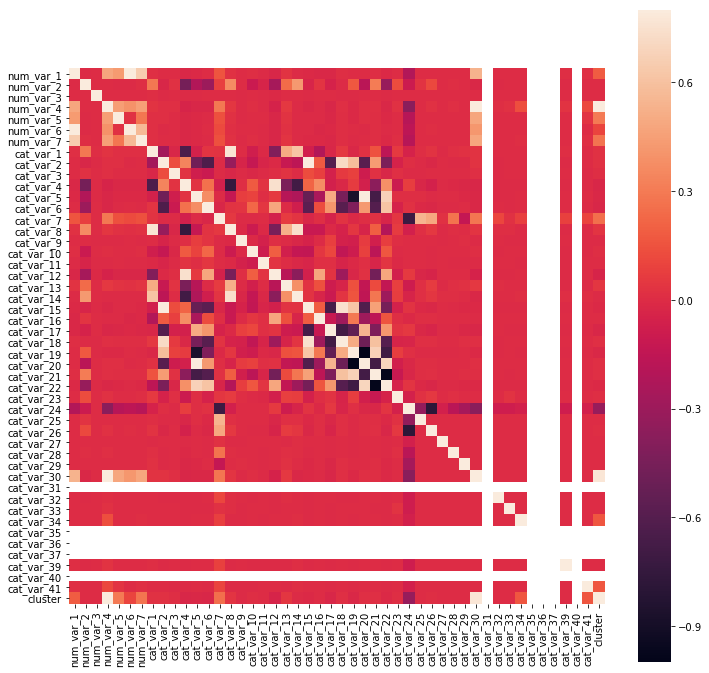

In [56]:
import seaborn as sns
#correlation matrix
corrmat = new_train_modified.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [259]:
sample = pd.read_csv('prob2/sample_submissions.csv')

In [260]:
pred = clf1.predict(dtest)

In [261]:
sample['target'] = pred

In [217]:
sample.head()

,transaction_id,target
0,id_1,0.156264
1,id_6,0.168441
2,id_9,0.191971
3,id_14,0.178756
4,id_15,0.187595


In [262]:
sample.to_csv('prob2/sample94.csv', index=False)

In [219]:
new_train_modified['num_var_1+6'] = new_train_modified['num_var_1'] + new_train_modified['num_var_6']
test_modified['num_var_1+6'] = test_modified['num_var_1'] + test_modified['num_var_6']

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [62]:
train['cat_var_4'].value_counts()

tn    232909
ep    116069
Name: cat_var_4, dtype: int64

In [72]:
checker = pd.DataFrame(data={'num_var_3':train['num_var_3'], 'target':target})

In [73]:
checker.groupby(['num_var_3', 'target']).size()

num_var_3  target
0.000000   0         311599
           1          37367
0.034483   0              4
           1              1
0.137931   0              1
0.275862   0              1
0.310345   0              1
0.689655   0              2
0.724138   0              1
0.758621   0              1
dtype: int64

In [70]:
train['num_var_3'].value_counts()

0.000000    348966
0.034483         5
0.689655         2
0.137931         1
0.758621         1
0.275862         1
0.310345         1
0.724138         1
Name: num_var_3, dtype: int64

In [194]:
lgb = pd.read_csv('sub_annual_fraudalent_lgb.csv')
cata = pd.read_csv('sub_annual_fraudalent_cata.csv')
rf = pd.read_csv('sub_annual_fraudalent_rf.csv')
xgm = pd.read_csv('prob2/sample90.csv')

In [158]:
sample['target'] = 0.44*lgb['target'] + 0.46*cata['target'] + 0.1*rf['target']

In [159]:
sample.to_csv('ensemble2.csv', index=False)

In [208]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=1).fit_transform(pcadf[cluster_map])
print(pca.shape)

(654254, 1)


In [209]:
new_train_modified['pca1'] = pca[:new_train_modified.shape[0]]
test_modified['pca1'] = pca[-test_modified.shape[0]:]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [207]:
pcadf = pd.concat([new_train_modified, test_modified])